### 1. Data Import

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.graph_objects as go
import folium
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing main dataset
df = pd.read_csv('/content/covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

India_coord = pd.read_excel('/content/final_cordinates.xlsx')

df.tail(10)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14392,14393,2021-04-30,8:00 AM,Puducherry,-,-,47645,793,57427
14393,14394,2021-04-30,8:00 AM,Punjab,-,-,301047,8909,364910
14394,14395,2021-04-30,8:00 AM,Rajasthan,-,-,407243,4084,580846
14395,14396,2021-04-30,8:00 AM,Sikkim,-,-,6354,146,7747
14396,14397,2021-04-30,8:00 AM,Tamil Nadu,-,-,1021575,13933,1148064
14397,14398,2021-04-30,8:00 AM,Telangana,-,-,355618,2261,435606
14398,14399,2021-04-30,8:00 AM,Tripura,-,-,33612,396,35169
14399,14400,2021-04-30,8:00 AM,Uttarakhand,-,-,124046,2502,174867
14400,14401,2021-04-30,8:00 AM,Uttar Pradesh,-,-,896477,12238,1217952
14401,14402,2021-04-30,8:00 AM,West Bengal,-,-,689466,11248,810955


In [ ]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14397,14398,2021-04-30,8:00 AM,Telangana,-,-,355618,2261,435606
14398,14399,2021-04-30,8:00 AM,Tripura,-,-,33612,396,35169
14399,14400,2021-04-30,8:00 AM,Uttarakhand,-,-,124046,2502,174867
14400,14401,2021-04-30,8:00 AM,Uttar Pradesh,-,-,896477,12238,1217952
14401,14402,2021-04-30,8:00 AM,West Bengal,-,-,689466,11248,810955


In [ ]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']
df

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
14397,2021-04-30,Telangana,355618,2261,435606
14398,2021-04-30,Tripura,33612,396,35169
14399,2021-04-30,Uttarakhand,124046,2502,174867
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952


In [ ]:
#looking at the latest dates
df.tail(34)

,date,state,cured,deaths,confirmed
14368,2021-04-30,Arunachal Pradesh,17085,59,18256
14369,2021-04-30,Assam,224194,1281,249926
14370,2021-04-30,Bihar,351162,2480,454464
14371,2021-04-30,Chandigarh,34806,465,41923
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14373,2021-04-30,Dadra and Nagar Haveli and Daman and Diu,5249,4,7334
14374,2021-04-30,Delhi,1008537,15772,1122286
14375,2021-04-30,Goa,65984,1146,88028
14376,2021-04-30,Gujarat,408368,7010,553172
14377,2021-04-30,Haryana,376852,4118,474145


In [ ]:
k=df[df.state=='Kerala']
g=df[df.state=='Gujarat']
m=df[df.state=='Maharashtra']
t=df[df.state=='Tamil Nadu']
d=df[df.state=='Delhi']
ka=df[df.state=='Karnataka']
ka


,date,state,cured,deaths,confirmed
74,2020-03-09,Karnataka,0,0,1
89,2020-03-10,Karnataka,0,0,4
108,2020-03-11,Karnataka,0,0,4
119,2020-03-12,Karnataka,0,0,4
132,2020-03-13,Karnataka,0,1,6
...,...,...,...,...,...
14237,2021-04-26,Karnataka,1062594,14426,1339201
14273,2021-04-27,Karnataka,1073257,14627,1368945
14309,2021-04-28,Karnataka,1084050,14807,1400775
14345,2021-04-29,Karnataka,1095883,15036,1439822


In [ ]:
#current date
endday = df[df.date == '2021-04-30']
endday

,date,state,cured,deaths,confirmed
14366,2021-04-30,Andaman and Nicobar Islands,5643,67,5875
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14368,2021-04-30,Arunachal Pradesh,17085,59,18256
14369,2021-04-30,Assam,224194,1281,249926
14370,2021-04-30,Bihar,351162,2480,454464
14371,2021-04-30,Chandigarh,34806,465,41923
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14373,2021-04-30,Dadra and Nagar Haveli and Daman and Diu,5249,4,7334
14374,2021-04-30,Delhi,1008537,15772,1122286
14375,2021-04-30,Goa,65984,1146,88028


In [ ]:
endday['Active'] = endday['confirmed'] - (endday['deaths'] + endday['cured'])
total_active = endday['Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = endday.groupby('state')['Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Oranges')
#endday.to_csv(r'v1.csv', index = False)

Total number of active COVID 2019 cases across India: 3170228


,Active
state,
Maharashtra,672302
Karnataka,349515
Uttar Pradesh,309237
Kerala,284424
Rajasthan,169519
Gujarat,137794
Chhattisgarh,117910
Andhra Pradesh,114158
Tamil Nadu,112556


Geographical representation of covid cases with folium

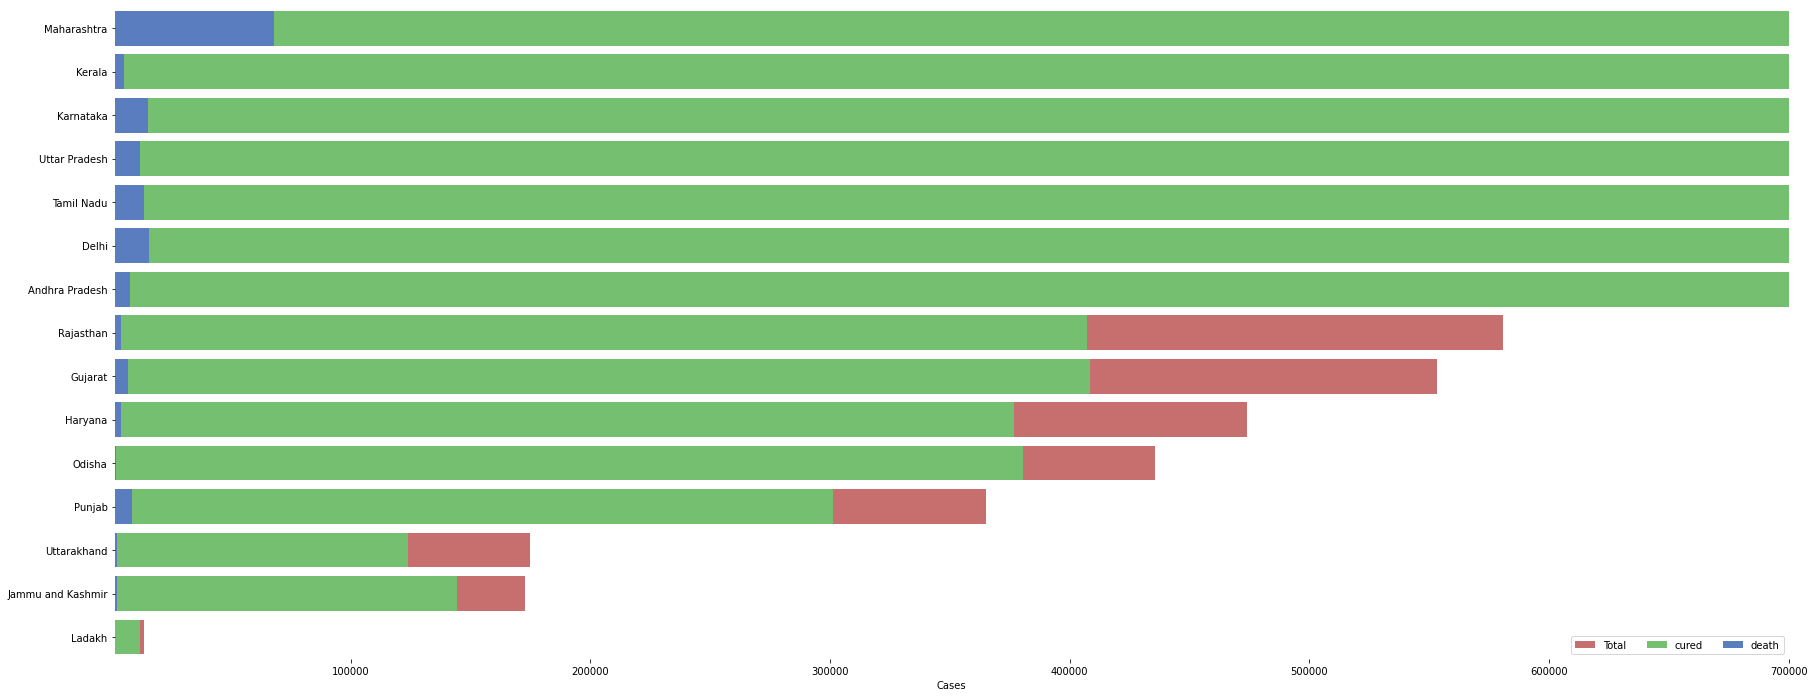

In [ ]:
f, ax = plt.subplots(figsize=(30, 12))
data = df_full[['state','confirmed','cured','deaths']]
data.sort_values('confirmed',ascending=False,inplace=True)
sns.set_color_codes("muted")
sns.barplot(x="confirmed", y="state", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="cured", y="state", data=data, label="cured", color="g")
sns.set_color_codes("muted")
sns.barplot(x="deaths", y="state", data=data, label="death", color="b")


# Add a legend and informative axis label
ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(1500, 700000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=m['date'], y = m['cured'], mode='lines+markers',name='maharastra_cured'))
fig.add_trace(go.Scatter(x=m['date'], y = m['confirmed'], mode='lines+markers',name='maharastra'))
fig.add_trace(go.Scatter(x=t['date'], y = t['confirmed'], mode='lines+markers',name='tamil nadu'))
fig.add_trace(go.Scatter(x=t['date'], y = t['cured'], mode='lines+markers',name='tamil nadu_cured'))
fig.add_trace(go.Scatter(x=g['date'], y = g['confirmed'], mode='lines+markers',name='gujarat'))
fig.add_trace(go.Scatter(x=g['date'], y = g['cured'], mode='lines+markers',name='gujarat_cured'))
fig.add_trace(go.Scatter(x=k['date'], y = k['confirmed'], mode='lines+markers',name='kerela'))
fig.add_trace(go.Scatter(x=k['date'], y = k['cured'], mode='lines+markers',name='kerela_cured'))
fig.add_trace(go.Scatter(x=d['date'], y = d['confirmed'], mode='lines+markers',name='delhi'))
fig.add_trace(go.Scatter(x=k['date'], y = k['cured'], mode='lines+markers',name='delhi_cured'))
fig.add_trace(go.Scatter(x=ka['date'], y = ka['confirmed'], mode='lines+markers',name='karnataka'))
fig.add_trace(go.Scatter(x=d['date'], y = d['cured'], mode='lines+markers',name='karnataka_cured'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=ka['date'], y = ka['confirmed'], mode='lines+markers',name='karnataka'))
fig.add_trace(go.Scatter(x=ka['date'], y = ka['cured'], mode='lines+markers',name='karnataka_cured'))
fig.add_trace(go.Scatter(x=ka['date'], y = ka['deaths'], mode='lines+markers',name='karnataka_death'))
fig.update_layout(title_text='karnataka',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=g['date'], y = g['confirmed'], mode='lines+markers',name='gujarat'))
fig.add_trace(go.Scatter(x=g['date'], y = g['cured'], mode='lines+markers',name='gujarat_cured'))
fig.add_trace(go.Scatter(x=g['date'], y = g['deaths'], mode='lines+markers',name='gujarat_death'))
fig.update_layout(title_text='gujarat',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=t['date'], y = t['confirmed'], mode='lines+markers',name='tamilnadu'))
fig.add_trace(go.Scatter(x=t['date'], y = t['cured'], mode='lines+markers',name='tamilnadu_cured'))
fig.add_trace(go.Scatter(x=t['date'], y = t['deaths'], mode='lines+markers',name='tamilnadu_death'))
fig.update_layout(title_text='tamilnadu',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['cured'].reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y = confirmed['confirmed'], mode='lines+markers',name='india'))
fig.add_trace(go.Scatter(x=deaths['date'], y = deaths['deaths'], mode='lines+markers',name='india_death'))
fig.add_trace(go.Scatter(x=recovered['date'], y = recovered['cured'], mode='lines+markers',name='india_cured'))
fig.update_layout(title_text='india',plot_bgcolor='rgb(230, 230, 230)')
fig.show()




forcasting confirmed case using promfet

In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed


,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
267,2020-10-23,7761312
268,2020-10-24,7814682
269,2020-10-25,7864811
270,2020-10-26,7909959


In [ ]:
mc = Prophet(interval_width=1)
mc.fit(confirmed)
future = mc.make_future_dataframe(periods=7)
future


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
...,...
274,2020-10-30
275,2020-10-31
276,2020-11-01
277,2020-11-02


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = mc.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
269,2020-10-25,8.089255e+06,7.938377e+06,8.276415e+06
270,2020-10-26,8.167293e+06,8.020589e+06,8.313325e+06
271,2020-10-27,8.241905e+06,8.068288e+06,8.442349e+06
272,2020-10-28,8.327596e+06,8.133495e+06,8.483644e+06
273,2020-10-29,8.407549e+06,8.249535e+06,8.591395e+06
274,2020-10-30,8.487289e+06,8.301106e+06,8.684053e+06
275,2020-10-31,8.567015e+06,8.395950e+06,8.725957e+06
276,2020-11-01,8.646821e+06,8.498264e+06,8.834631e+06
277,2020-11-02,8.724859e+06,8.555867e+06,8.894709e+06
278,2020-11-03,8.799471e+06,8.599439e+06,8.958724e+06


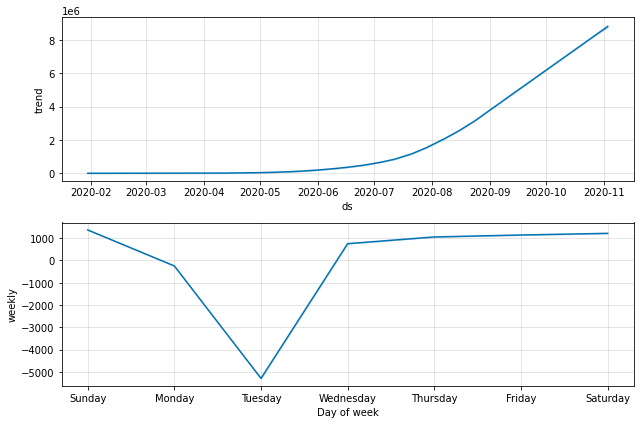

In [ ]:
confirmed_forecast_plot =mc.plot_components(forecast)

forcasing cured cases

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
mr= Prophet(interval_width=1)
mr.fit(recovered)
future = mr.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
274,2020-10-30
275,2020-10-31
276,2020-11-01
277,2020-11-02
278,2020-11-03


In [ ]:
forecast1 = mr.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
269,2020-10-25,7.156496e+06,7.078072e+06,7.223661e+06
270,2020-10-26,7.235609e+06,7.166678e+06,7.292893e+06
271,2020-10-27,7.316101e+06,7.238808e+06,7.386765e+06
272,2020-10-28,7.399972e+06,7.311708e+06,7.484500e+06
273,2020-10-29,7.480233e+06,7.418909e+06,7.559069e+06
274,2020-10-30,7.560479e+06,7.493044e+06,7.652762e+06
275,2020-10-31,7.641121e+06,7.559576e+06,7.718181e+06
276,2020-11-01,7.722451e+06,7.650142e+06,7.825065e+06
277,2020-11-02,7.801564e+06,7.707175e+06,7.908910e+06
278,2020-11-03,7.882055e+06,7.789097e+06,8.001505e+06


In [ ]:
i=forecast['yhat']-forecast1['yhat']
i.tail(10)

269    932758.536226
270    931683.582107
271    925803.414019
272    927624.063042
273    927316.274339
274    926809.891268
275    925894.363759
276    924370.452720
277    923295.498602
278    917415.330513
Name: yhat, dtype: float64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['ds'], y = confirmed['y'], mode='lines+markers',name='india_real'))
fig.add_trace(go.Scatter(x=forecast['ds'], y = forecast['yhat_upper'], mode='lines+markers',name='india-prediction'))


fig.update_layout(title_text='real vs pridicition confirmed case',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=recovered['ds'], y = recovered['y'], mode='lines+markers',name='india_real'))
fig.add_trace(go.Scatter(x=forecast1['ds'], y = forecast1['yhat'], mode='lines+markers',name='india-prediction'))


fig.update_layout(title_text='real vs pridicition cured case',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


Pridiction_of_gujrat

In [ ]:
#gujarat
confirmed_gujarat=g.groupby('date').sum()['confirmed'].reset_index()
confirmed_gujarat.columns=['ds','y']
confirmed_gujarat['ds'] = pd.to_datetime(confirmed_gujarat['ds'])
confirmed_gujarat


,ds,y
0,2020-03-20,5
1,2020-03-21,7
2,2020-03-22,18
3,2020-03-23,29
4,2020-03-24,33
...,...,...
152,2020-08-19,80802
153,2020-08-20,81942
154,2020-08-21,83107
155,2020-08-22,84311


In [ ]:
m1 = Prophet(interval_width=1)
m1.fit(confirmed_gujarat)
future1 = m1.make_future_dataframe(periods=7)
future1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-03-20
1,2020-03-21
2,2020-03-22
3,2020-03-23
4,2020-03-24
...,...
159,2020-08-26
160,2020-08-27
161,2020-08-28
162,2020-08-29


In [ ]:
forecast3 = m1.predict(future)
#forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast3['error']=(confirmed_gujarat['y']-forecast3['yhat'])
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper','error']].tail(10)

,ds,yhat,yhat_lower,yhat_upper,error
204,2020-08-21,83051.780060,82867.456019,83246.694644,NaN
205,2020-08-22,84139.967670,83962.804065,84334.543201,NaN
206,2020-08-23,85271.584894,85078.332103,85469.891134,NaN
207,2020-08-24,86362.660354,86119.714447,86642.146621,NaN
208,2020-08-25,87441.947800,86963.048252,88023.536327,NaN
209,2020-08-26,88521.933335,87644.041654,89346.674189,NaN
210,2020-08-27,89608.800941,88307.410258,90910.915985,NaN
211,2020-08-28,90690.313503,89246.470102,92390.238701,NaN
212,2020-08-29,91778.501113,90095.491521,94008.367385,NaN
213,2020-08-30,92910.118337,90843.757212,95620.734892,NaN


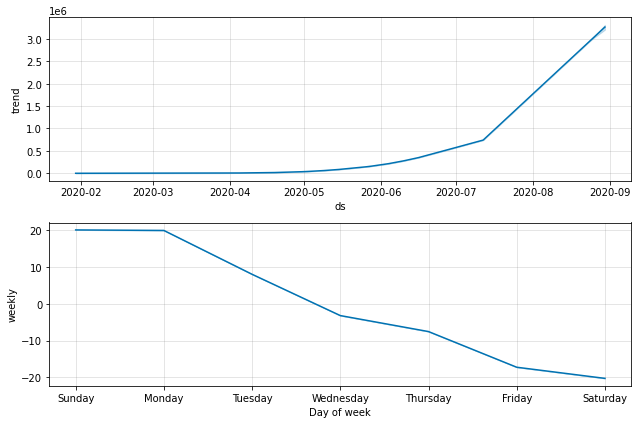

In [ ]:
confirmed_forecast_plot =m1.plot_components(forecast)

Maharastra

In [ ]:
confirmed_maharastra=m.groupby('date').sum()['confirmed'].reset_index()
confirmed_maharastra.columns=['ds','y']
confirmed_maharastra['ds'] = pd.to_datetime(confirmed_maharastra['ds'])
confirmed_maharastra

,ds,y
0,2020-03-09,2
1,2020-03-10,5
2,2020-03-11,2
3,2020-03-12,11
4,2020-03-13,14
...,...,...
163,2020-08-19,615477
164,2020-08-20,628642
165,2020-08-21,643289
166,2020-08-22,657450


In [ ]:
m2 = Prophet(interval_width=1)
m2.fit(confirmed_maharastra)
future2 = m2.make_future_dataframe(periods=7)
future2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-03-09
1,2020-03-10
2,2020-03-11
3,2020-03-12
4,2020-03-13
...,...
170,2020-08-26
171,2020-08-27
172,2020-08-28
173,2020-08-29


In [ ]:
forecast4 = m2.predict(future)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-21,634341.625519,626182.918031,645762.469189
205,2020-08-22,645118.534877,637296.589670,654993.518305
206,2020-08-23,656017.107514,645077.166836,667662.288725
207,2020-08-24,666006.142141,657196.472522,674403.310954
208,2020-08-25,675902.872796,666496.723244,687954.541471
209,2020-08-26,685773.495810,676010.253111,696086.523380
210,2020-08-27,696317.077439,684463.990855,714293.020371
211,2020-08-28,707153.333895,694693.958578,727112.001710
212,2020-08-29,717930.243253,702505.183898,742496.494370
213,2020-08-30,728828.815891,707312.395014,755008.252375


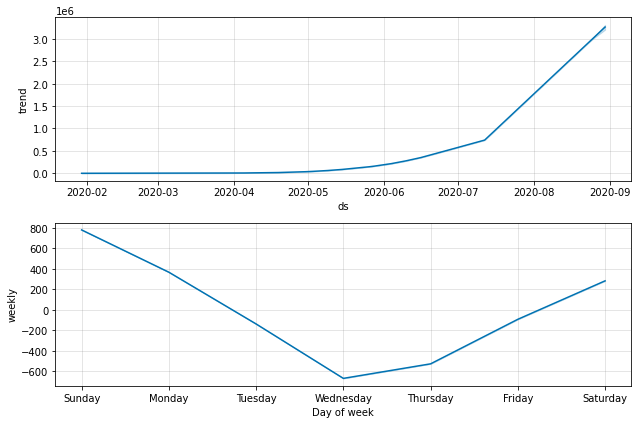

In [ ]:
confirmed_forecast_plot =m2.plot_components(forecast)

testing

In [ ]:
#Checking state-wise testing details
tests = pd.read_csv('/content/datasets_557629_1437601_StatewiseTestingDetails.csv')
tests.tail()

,Date,State,TotalSamples,Negative,Positive
4431,2020-08-18,West Bengal,1382198.0,NaN,122753.0
4432,2020-08-19,West Bengal,1416556.0,NaN,NaN
4433,2020-08-20,West Bengal,1451615.0,NaN,NaN
4434,2020-08-21,West Bengal,1487844.0,NaN,132364.0
4435,2020-08-22,West Bengal,1524162.0,NaN,135596.0


In [ ]:
test_latest =  tests[tests.Date == '2020-07-22']
test_latest.tail()

,Date,State,TotalSamples,Negative,Positive
3870,2020-07-22,Telangana,308959.0,NaN,49259.0
3989,2020-07-22,Tripura,123269.0,119801,3471.0
4127,2020-07-22,Uttar Pradesh,1600000.0,NaN,55588.0
4264,2020-07-22,Uttarakhand,129783.0,112210,5300.0
4404,2020-07-22,West Bengal,743469.0,NaN,49321.0


In [ ]:
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive
3799,2020-07-22,Tamil Nadu,2095757.0,NaN,186492.0
2553,2020-07-22,Maharashtra,1691546.0,1348610,342936.0
4127,2020-07-22,Uttar Pradesh,1600000.0,NaN,55588.0
202,2020-07-22,Andhra Pradesh,1435827.0,1371114,64713.0
3554,2020-07-22,Rajasthan,1298218.0,1259602,32334.0
2037,2020-07-22,Karnataka,1079749.0,1002045,75833.0
1090,2020-07-22,Delhi,871371.0,NaN,126323.0
4404,2020-07-22,West Bengal,743469.0,NaN,49321.0
443,2020-07-22,Assam,703374.0,NaN,27744.0
2415,2020-07-22,Madhya Pradesh,645003.0,616100,24842.0


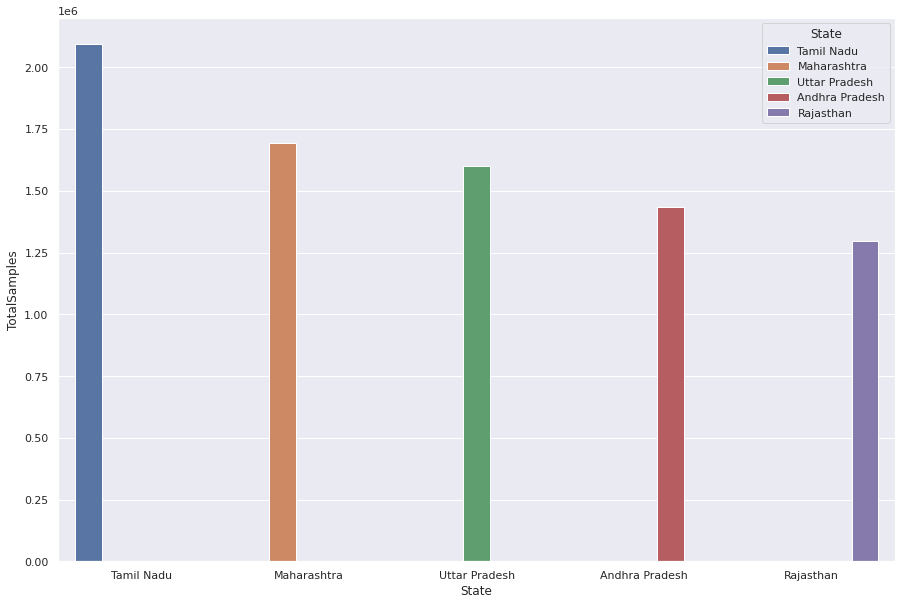

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:5],hue="State")
plt.show()